In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
from qtplaskin import FastDirData
from scipy.interpolate import interp1d

In [2]:
# preparing DFT data for DFT-microkinetic model calculation
ele = [-1.393915286, -0.407617857, 0., 0.405267196, 0.814412714, 0.081528]

N_Fs_ace = np.array([-7.218459718, -6.805586425, -6.824520378, -6.823414099, -6.799233111, -6.826058909])
H_Fs_ace = np.array([-2.388541494, -3.067980264, -3.076884645, -3.073195325, -2.622256844, -3.07631307])
NH_Fs_ace = np.array([-4.803133612, -5.618005169, -5.694338271, -5.498953732, -5.281075039, -5.656928468])
NH2_Fs_ace = np.array([-2.361182527, -3.405726191, -3.469292528, -3.224236737, -2.961949202, -3.417703146])
N_Ns_ace = np.array([-4.0609781, -3.383086048, -3.365234972, -3.365270755, -3.386120934, -3.363641065])
H_Hs_ace = np.array([-0.933772476, -1.469302618, -1.463908777, -1.461776357, -1.030964503, -1.461998266])
N_Hs_ace = np.array([-7.120050565, -6.454734134, -6.397466824, -6.328579301, -6.248736747, -6.384576928])
NH_Hs_ace = np.array([-3.982110105, -4.636308917, -4.672999795, -4.448341929, -4.212954887, -4.628812453])
NH2_Hs_ace = np.array([-2.646921242, -1.789230668, -1.801396333, -1.782963478, -1.77260873, -1.792679847])
H_Ns_ace = np.array([-2.29013234, -2.717127973, -2.649831091, -2.578360528, -2.07176048, -2.634831088])
H_NHs_ace = np.array([-1.567517987, -2.086284012, -2.055546168, -2.022583523, -1.554136692, -2.048197054])
H_NH2s_ace = np.array([-2.674280208, -1.45148474, -1.408988449, -1.631922066, -1.432916372, -1.45128977])
H2_NHs_ace = np.array([-0.919484226, 0.99951413, 1.076258804, 0.880466094, 0.666168283, 1.038824512])
Ns_Hs_ACT_E = np.array([0.098409153, 0.350852291, 0.427053554, 0.494834798, 0.550496364, 0.441481982])
NHs_Hs_ACT_E = np.array([0.821023507, 0.981696252, 1.021338476, 1.050611803, 1.068120152, 1.028116016])
NH2s_Hs_ACT_E = np.array([-0.088643668, 0.466271688, 0.576332348, 0.656727702, 0.699992578, 0.594313903])

pred_collect = [N_Fs_ace, H_Fs_ace, NH_Fs_ace, NH2_Fs_ace, N_Ns_ace, H_Hs_ace, 
                N_Hs_ace, NH_Hs_ace, NH2_Hs_ace, H_Ns_ace, H_NHs_ace, H_NH2s_ace, 
                H2_NHs_ace, Ns_Hs_ACT_E, NHs_Hs_ACT_E, NH2s_Hs_ACT_E]



In [3]:
import ase.io
NH3 = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/NH3/NH3_480c.out')
NH2 = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/NH2/NH2_480c.out')
NH = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/NH/NH_480c.out')
N2 = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/N2/N2_480c.out')
H2 = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c/H2/H2_480c.out')
NH3VibFreq = np.array([29.873518, 48.268753, 48.376690, 102.591527, 105.356074, 105.705903])
NH2VibFreq = np.array([44.455421 ,98.993812,100.970636])
NHVibFreq = np.array([95.664843])
N2VibFreq = np.array([71.846146])
H2VibFreq = np.array([129.287876])

NH3_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/NH3/NH3_480c_ESM_std.out')
NH2_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/NH2/NH2_480c_ESM_std.out')
NH_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/NH/NH_480c_ESM_std.out')
N2_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/N2/N2_480c_ESM_std.out')
H2_std = ase.io.read('../python_runs/QE_scripts/Fe_110_paper_480c_ESM_std_ph/H2/H2_480c_ESM_std.out')
NH3VibFreq_std = np.array([30.491253, 48.323540, 48.522389, 102.580769, 105.331318, 105.472909])
NH2VibFreq_std = np.array([44.411467 ,98.924383,100.915677])
NHVibFreq_std = np.array([95.444633])
N2VibFreq_std = np.array([71.729771])
H2VibFreq_std = np.array([129.330179])

NH3_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/NH3/NH3_480c_ESM_VA4.out')
NH2_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/NH2/NH2_480c_ESM_VA4.out')
NH_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/NH/NH_480c_ESM_VA4.out')
N2_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/N2/N2_480c_ESM_VA4.out')
H2_VA4 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA4_ph/H2/H2_480c_ESM_VA4.out')
NH3VibFreq_VA4 = np.array([32.807271, 48.621394, 48.718848, 103.045993, 104.796485, 104.878056])
NH2VibFreq_VA4 = np.array([44.961264 ,99.367311,100.975273])
NHVibFreq_VA4 = np.array([96.358749])
N2VibFreq_VA4 = np.array([71.995244])
H2VibFreq_VA4 = np.array([129.303421])

NH3_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/NH3/NH3_480c_ESM_VA8.out')
NH2_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/NH2/NH2_480c_ESM_VA8.out')
NH_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/NH/NH_480c_ESM_VA8.out')
N2_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/N2/N2_480c_ESM_VA8.out')
H2_VA8 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA8_ph/H2/H2_480c_ESM_VA8.out')
NH3VibFreq_VA8 = np.array([34.790557, 48.841661, 48.882073, 102.370931, 104.298613, 104.376668])
NH2VibFreq_VA8 = np.array([45.312526 ,99.610839,100.911359])
NHVibFreq_VA8 = np.array([96.594934])
N2VibFreq_VA8 = np.array([71.747081])
H2VibFreq_VA8 = np.array([128.864196])

NH3_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/NH3/NH3_480c_ESM_VA12.out')
NH2_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/NH2/NH2_480c_ESM_VA12.out')
NH_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/NH/NH_480c_ESM_VA12.out')
N2_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/N2/N2_480c_ESM_VA12.out')
H2_VA12 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA12_ph/H2/H2_480c_ESM_VA12.out')
NH3VibFreq_VA12 = np.array([36.165789, 48.899393, 48.925232, 101.747648, 103.704440, 103.732741])
NH2VibFreq_VA12 = np.array([45.614517 ,99.552992,100.715363])
NHVibFreq_VA12 = np.array([96.560803])
N2VibFreq_VA12 = np.array([71.653993])
H2VibFreq_VA12 = np.array([128.152862])

NH3_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/NH3/NH3_480c_ESM_VA16.out')
NH2_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/NH2/NH2_480c_ESM_VA16.out')
NH_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/NH/NH_480c_ESM_VA16.out')
N2_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/N2/N2_480c_ESM_VA16.out')
H2_VA16 = ase.io.read('../QE_scripts/Fe_110_paper_480c_ESM_VA16_ph/H2/H2_480c_ESM_VA16.out')
NH3VibFreq_VA16 = np.array([37.368766, 48.783582, 48.902151, 101.659757, 103.072967, 103.352376])
NH2VibFreq_VA16 = np.array([45.951663 ,99.365405,100.403303])
NHVibFreq_VA16 = np.array([96.164146])
N2VibFreq_VA16 = np.array([71.294521])
H2VibFreq_VA16 = np.array([126.471423])

In [4]:
EleFieldforEntropy = [0., 0.081528, 0.405267196, 0.405267196*2, 0.405267196*3, 0.405267196*4]
H2VibFreqColl = [H2VibFreq, H2VibFreq_std, H2VibFreq_VA4, H2VibFreq_VA8, H2VibFreq_VA12, H2VibFreq_VA16]
N2VibFreqColl = [N2VibFreq, N2VibFreq_std, N2VibFreq_VA4, N2VibFreq_VA8, N2VibFreq_VA12, N2VibFreq_VA16]
NHVibFreqColl = [NHVibFreq, NHVibFreq_std, NHVibFreq_VA4, NHVibFreq_VA8, NHVibFreq_VA12, NHVibFreq_VA16]
NH2VibFreqColl = [NH2VibFreq, NH2VibFreq_std, NH2VibFreq_VA4, NH2VibFreq_VA8, NH2VibFreq_VA12, NH2VibFreq_VA16]
NH3VibFreqColl = [NH3VibFreq, NH3VibFreq_std, NH3VibFreq_VA4, NH3VibFreq_VA8, NH3VibFreq_VA12, NH3VibFreq_VA16]
H2Coll = [H2, H2_std, H2_VA4, H2_VA8, H2_VA12, H2_VA16]
N2Coll = [N2, N2_std, N2_VA4, N2_VA8, N2_VA12, N2_VA16]
NHColl = [NH, NH_std, NH_VA4, NH_VA8, NH_VA12, NH_VA16]
NH2Coll = [NH2, NH2_std, NH2_VA4, NH2_VA8, NH2_VA12, NH2_VA16]
NH3Coll = [NH3, NH3_std, NH3_VA4, NH3_VA8, NH3_VA12, NH3_VA16]
H2InertiaColl = [_.get_moments_of_inertia()[1] for _ in H2Coll]
N2InertiaColl = [_.get_moments_of_inertia()[1] for _ in N2Coll]
NHInertiaColl = [_.get_moments_of_inertia()[1] for _ in NHColl]
NH2InertiaColl = [_.get_moments_of_inertia() for _ in NH2Coll]
NH3InertiaColl = [_.get_moments_of_inertia() for _ in NH3Coll]

In [5]:
allList = [H2VibFreqColl, N2VibFreqColl, NHVibFreqColl, NH2VibFreqColl, NH3VibFreqColl, H2InertiaColl, N2InertiaColl, NHInertiaColl, NH2InertiaColl, NH3InertiaColl]

In [6]:
entropyPara = np.vstack([np.array(_).reshape(6,-1).T for _ in allList])

In [7]:
# Building using entropy
ele_range = -1*np.linspace(0.05, 0.20, 15)
ele_final_col_500 = np.zeros((ele_range.shape[0], 4)) # only 4 reactions using reaction energies
ele_final_col_1000 = np.zeros((ele_range.shape[0], 4))
ele_final_col_5000 = np.zeros((ele_range.shape[0], 4))
ele_final_col_10000 = np.zeros((ele_range.shape[0], 4))

basis = -1*np.array([0.081528/2, 0.081528, 0.081528*5, 0.081528*10]).reshape(-1,1)
basis_col = np.zeros((basis.shape[0], 4))

for ele_id, cur_ele in enumerate(pred_collect):
    mymodel = np.poly1d(np.polyfit(ele[1:], cur_ele[1:], 3))
    #mymodel(myline)
    if ele_id < 12:
        continue
    else:
        basis_col[:, ele_id-12] = mymodel(basis.reshape(-1))
        ele_final_col_500[:, ele_id-12] = mymodel(ele_range.reshape(-1)/2)
        ele_final_col_1000[:, ele_id-12] = mymodel(ele_range.reshape(-1))
        ele_final_col_5000[:, ele_id-12] = mymodel(ele_range.reshape(-1)*5)
        ele_final_col_10000[:, ele_id-12] = mymodel(ele_range.reshape(-1)*10)
        
        
ele_range_entropy = np.linspace(0.05, 0.20, 15)
ele_final_col_500_entropy = np.zeros((ele_range_entropy.shape[0], entropyPara.shape[0]))
ele_final_col_1000_entropy = np.zeros((ele_range_entropy.shape[0], entropyPara.shape[0]))
ele_final_col_5000_entropy = np.zeros((ele_range_entropy.shape[0], entropyPara.shape[0]))
ele_final_col_10000_entropy = np.zeros((ele_range_entropy.shape[0], entropyPara.shape[0]))

basis_entropy = np.array([0.081528/2, 0.081528, 0.081528*5, 0.081528*10]).reshape(-1,1)
basis_col_entropy = np.zeros((basis.shape[0], entropyPara.shape[0]))

for ele_id, cur_ele in enumerate(entropyPara):
    mymodel = np.poly1d(np.polyfit(EleFieldforEntropy, cur_ele, 3))
    basis_col_entropy[:, ele_id] = mymodel(basis_entropy.reshape(-1))
    ele_final_col_500_entropy[:, ele_id] = mymodel(ele_range_entropy.reshape(-1)/2)
    ele_final_col_1000_entropy[:, ele_id] = mymodel(ele_range_entropy.reshape(-1))
    ele_final_col_5000_entropy[:, ele_id] = mymodel(ele_range_entropy.reshape(-1)*5)
    ele_final_col_10000_entropy[:, ele_id] = mymodel(ele_range_entropy.reshape(-1)*10)

In [8]:
# DFT-microkinetic model
def kineCal_extract(Temp, ED, EF, N2_frac):
    ele_final_col_500 = np.zeros((1, 4)) # only 4 reactions using reaction energies
    ele_final_col_1000 = np.zeros((1, 4))
    ele_final_col_5000 = np.zeros((1, 4))
    ele_final_col_10000 = np.zeros((1, 4))
    for ele_id, cur_ele in enumerate(pred_collect):
        mymodel = np.poly1d(np.polyfit(ele[1:], cur_ele[1:], 3))
        #mymodel(myline)
        if ele_id < 12:
            continue
        else:
            basis_col[:, ele_id-12] = mymodel(basis.reshape(-1))
            ele_final_col_500[:, ele_id-12] = mymodel(-EF/2)
            ele_final_col_1000[:, ele_id-12] = mymodel(-EF)
            ele_final_col_5000[:, ele_id-12] = mymodel(-EF*5)
            ele_final_col_10000[:, ele_id-12] = mymodel(-EF*10)
    
    ele_final_col_500_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_1000_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_5000_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_10000_entropy = np.zeros((1, entropyPara.shape[0]))
    for ele_id, cur_ele in enumerate(entropyPara):
        mymodel = np.poly1d(np.polyfit(EleFieldforEntropy, cur_ele, 3))
        basis_col_entropy[:, ele_id] = mymodel(basis_entropy.reshape(-1))
        ele_final_col_500_entropy[:, ele_id] = mymodel(EF/2)
        ele_final_col_1000_entropy[:, ele_id] = mymodel(EF)
        ele_final_col_5000_entropy[:, ele_id] = mymodel(EF*5)
        ele_final_col_10000_entropy[:, ele_id] = mymodel(EF*10)
    
    # necessary, mapping the magnitude back for ZDPlaskin
    EF = EF*1e10/1e3
    
    fake_pulse = pd.DataFrame(np.vstack((EF,ED)).T)
    fake_pulse.columns = ["EField", "Electrons_cm-3"]
    fake_pulse.to_csv('./Model_SA_Const_Entropy_extract/Ele.dat', sep=' ',index=False)

    fake_gas_T = pd.DataFrame(np.array([Temp]).reshape(1,-1))
    fake_gas_T.columns = ["K"]
    fake_gas_T.to_csv('./Model_SA_Const_Entropy_extract/Tgas.dat', sep=' ',index=False)

    other_para = pd.DataFrame(np.array([N2_frac]).reshape(1,-1))
    other_para.columns = ["N2_frac"]
    other_para.to_csv('./Model_SA_Const_Entropy_extract/other_para.dat',sep=' ',index=False)

    fake_ac_E = pd.DataFrame(ele_final_col_10000[0, :].reshape(1,-1))
    fake_ac_E.columns = ['H2_NHs_ace', 'Ns_Hs_ACT_E', 'NHs_Hs_ACT_E', 'NH2s_Hs_ACT_E']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_extract/REACTION_E_IN.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(basis_col[3, :].reshape(1,-1)) 
    #0 is 500 enhancement, 1 is 1000 enhancement, 2 is 5000, 3 is 10000
    fake_ac_E.columns = ['H2_NHs_ace', 'Ns_Hs_ACT_E', 'NHs_Hs_ACT_E', 'NH2s_Hs_ACT_E']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_extract/REACTION_E_BASIS.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(ele_final_col_10000_entropy[0, :].reshape(1,-1))
    fake_ac_E.columns = ['H2_vib_1', 'N2_vib_1', 'NH_vib_1', 'NH2_vib_1', 'NH2_vib_2', 'NH2_vib_3', 'NH3_vib_1', 'NH3_vib_2', 'NH3_vib_3', 'NH3_vib_4', 'NH3_vib_5', 'NH3_vib_6', 'H2_inertia_1', 'N2_inertia_1', 'NH_inertia_1', 'NH2_inertia_1', 'NH2_inertia_2', 'NH2_inertia_3', 'NH3_inertia_1', 'NH3_inertia_2', 'NH3_inertia_3']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_extract/ENTROPY_PARA_IN.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(basis_col_entropy[3, :].reshape(1,-1)) 
    #0 is 500 enhancement, 1 is 1000 enhancement, 2 is 5000, 3 is 10000
    fake_ac_E.columns = ['H2_vib_basis_1', 'N2_vib_basis_1', 'NH_vib_basis_1', 'NH2_vib_basis_1', 'NH2_vib_basis_2', 'NH2_vib_basis_3', 'NH3_vib_basis_1', 'NH3_vib_basis_2', 'NH3_vib_basis_3', 'NH3_vib_basis_4', 'NH3_vib_basis_5', 'NH3_vib_basis_6', 'H2_inertia_basis_1', 'N2_inertia_basis_1', 'NH_inertia_basis_1', 'NH2_inertia_basis_1', 'NH2_inertia_basis_2', 'NH2_inertia_basis_3', 'NH3_inertia_basis_1', 'NH3_inertia_basis_2', 'NH3_inertia_basis_3']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_extract/ENTROPY_INFO_BASIS.DAT', sep=' ',index=False)

    #NH3_res.append(d.get_spec('NH3')[-1])
    try:
        # make sure you have compiled the microkinetic ZDPlaskin model
        subprocess.run('cd Model_SA_Const_Entropy_extract && export LD_LIBRARY_PATH=.:$LD_LIBRARY_PATH && ./entropyV_extract.exe', shell=True)
        d = FastDirData('Model_SA_Const_Entropy_extract')
        return d.get_spec('NH3')[-1], -d.get_cond('power')[-1]
    except:
        # special error handle
        return 0., -10000.
    '''
    Cal_ER.append(d.get_cond('Reduced field [Td]')[-1])
    HSURF.append(d.get_spec('HSURF')[-1]*0.007*0.5)
    SURF.append(d.get_spec('SURF')[-1]*0.007*0.5)
    NSURF.append(d.get_spec('NSURF')[-1]*0.007*0.5)
    NH2SURF.append(d.get_spec('NH2SURF')[-1]*0.007*0.5)
    NHSURF.append(d.get_spec('NHSURF')[-1]*0.007*0.5)
    stickingPs = pd.read_csv('./Model_SA_Const_Entropy_extract/stickingP.txt',sep=' ', header=None)
    tmpStickings = []
    for _ in stickingPs:
        if stickingPs[_].notnull()[0]:
            tmpStickings.append(stickingPs[_][0])
    stickingCol.append(tmpStickings[:])

    entropies = pd.read_csv('./Model_SA_Const_Entropy_extract/entropy.txt',sep=' ', header=None)
    tmpentropies = []
    for _ in entropies:
        if entropies[_].notnull()[0]:
            tmpentropies.append(entropies[_][0])
    entropyCol.append(tmpentropies[:])

    entropiesRot = pd.read_csv('./Model_SA_Const_Entropy_extract/entropyRot.txt',sep=' ', header=None)
    tmpentropiesRot = []
    for _ in entropiesRot:
        if entropiesRot[_].notnull()[0]:
            tmpentropiesRot.append(entropiesRot[_][0])
    rotEntropyCol.append(tmpentropiesRot[:])

    entropiesVib = pd.read_csv('./Model_SA_Const_Entropy_extract/entropyVib.txt',sep=' ', header=None)
    tmpentropiesVib = []
    for _ in entropiesVib:
        if entropiesVib[_].notnull()[0]:
            tmpentropiesVib.append(entropiesVib[_][0])
    vibEntropyCol.append(tmpentropiesVib[:])
    '''


In [9]:
# micriokinetic model
def kineCal_base(Temp, ED, EF, N2_frac):
    ele_final_col_500 = np.zeros((1, 4)) # only 4 reactions using reaction energies
    ele_final_col_1000 = np.zeros((1, 4))
    ele_final_col_5000 = np.zeros((1, 4))
    ele_final_col_10000 = np.zeros((1, 4))
    for ele_id, cur_ele in enumerate(pred_collect):
        mymodel = np.poly1d(np.polyfit(ele[1:], cur_ele[1:], 3))
        #mymodel(myline)
        if ele_id < 12:
            continue
        else:
            basis_col[:, ele_id-12] = mymodel(basis.reshape(-1))
            ele_final_col_500[:, ele_id-12] = mymodel(-EF/2)
            ele_final_col_1000[:, ele_id-12] = mymodel(-EF)
            ele_final_col_5000[:, ele_id-12] = mymodel(-EF*5)
            ele_final_col_10000[:, ele_id-12] = mymodel(-EF*10)
    
    ele_final_col_500_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_1000_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_5000_entropy = np.zeros((1, entropyPara.shape[0]))
    ele_final_col_10000_entropy = np.zeros((1, entropyPara.shape[0]))
    for ele_id, cur_ele in enumerate(entropyPara):
        mymodel = np.poly1d(np.polyfit(EleFieldforEntropy, cur_ele, 3))
        basis_col_entropy[:, ele_id] = mymodel(basis_entropy.reshape(-1))
        ele_final_col_500_entropy[:, ele_id] = mymodel(EF/2)
        ele_final_col_1000_entropy[:, ele_id] = mymodel(EF)
        ele_final_col_5000_entropy[:, ele_id] = mymodel(EF*5)
        ele_final_col_10000_entropy[:, ele_id] = mymodel(EF*10)
    
    # necessary, mapping the magnitude back for ZDPlaskin
    EF = EF*1e10/1e3
    
    fake_pulse = pd.DataFrame(np.vstack((EF,ED)).T)
    fake_pulse.columns = ["EField", "Electrons_cm-3"]
    fake_pulse.to_csv('./Model_SA_Const_Entropy_base/Ele.dat', sep=' ',index=False)

    fake_gas_T = pd.DataFrame(np.array([Temp]).reshape(1,-1))
    fake_gas_T.columns = ["K"]
    fake_gas_T.to_csv('./Model_SA_Const_Entropy_base/Tgas.dat', sep=' ',index=False)

    other_para = pd.DataFrame(np.array([N2_frac]).reshape(1,-1))
    other_para.columns = ["N2_frac"]
    other_para.to_csv('./Model_SA_Const_Entropy_base/other_para.dat',sep=' ',index=False)

    fake_ac_E = pd.DataFrame(ele_final_col_10000[0, :].reshape(1,-1))
    fake_ac_E.columns = ['H2_NHs_ace', 'Ns_Hs_ACT_E', 'NHs_Hs_ACT_E', 'NH2s_Hs_ACT_E']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_base/REACTION_E_IN.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(basis_col[3, :].reshape(1,-1)) 
    #0 is 500 enhancement, 1 is 1000 enhancement, 2 is 5000, 3 is 10000
    fake_ac_E.columns = ['H2_NHs_ace', 'Ns_Hs_ACT_E', 'NHs_Hs_ACT_E', 'NH2s_Hs_ACT_E']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_base/REACTION_E_BASIS.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(ele_final_col_10000_entropy[0, :].reshape(1,-1))
    fake_ac_E.columns = ['H2_vib_1', 'N2_vib_1', 'NH_vib_1', 'NH2_vib_1', 'NH2_vib_2', 'NH2_vib_3', 'NH3_vib_1', 'NH3_vib_2', 'NH3_vib_3', 'NH3_vib_4', 'NH3_vib_5', 'NH3_vib_6', 'H2_inertia_1', 'N2_inertia_1', 'NH_inertia_1', 'NH2_inertia_1', 'NH2_inertia_2', 'NH2_inertia_3', 'NH3_inertia_1', 'NH3_inertia_2', 'NH3_inertia_3']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_base/ENTROPY_PARA_IN.DAT', sep=' ',index=False)

    fake_ac_E = pd.DataFrame(basis_col_entropy[3, :].reshape(1,-1)) 
    #0 is 500 enhancement, 1 is 1000 enhancement, 2 is 5000, 3 is 10000
    fake_ac_E.columns = ['H2_vib_basis_1', 'N2_vib_basis_1', 'NH_vib_basis_1', 'NH2_vib_basis_1', 'NH2_vib_basis_2', 'NH2_vib_basis_3', 'NH3_vib_basis_1', 'NH3_vib_basis_2', 'NH3_vib_basis_3', 'NH3_vib_basis_4', 'NH3_vib_basis_5', 'NH3_vib_basis_6', 'H2_inertia_basis_1', 'N2_inertia_basis_1', 'NH_inertia_basis_1', 'NH2_inertia_basis_1', 'NH2_inertia_basis_2', 'NH2_inertia_basis_3', 'NH3_inertia_basis_1', 'NH3_inertia_basis_2', 'NH3_inertia_basis_3']
    fake_ac_E.to_csv('./Model_SA_Const_Entropy_base/ENTROPY_INFO_BASIS.DAT', sep=' ',index=False)

    try:
        subprocess.run('cd Model_SA_Const_Entropy_base && export LD_LIBRARY_PATH=.:$LD_LIBRARY_PATH && ./entropyV.exe', shell=True, timeout=30)
        d = FastDirData('Model_SA_Const_Entropy_base')
        return d.get_spec('NH3')[-1], -d.get_cond('power')[-1]
    except:
        return 0., -10000.

In [10]:
'''
'names': ["Electron_Density", 'Electric_Field', 'N2_Fraction', 'Temperature'],
    'bounds': [[5e7, 5e9],
               [0.05, 0.107],
               [0., 1.],
               [300., 600.]
              ]
'''

ne = 8.27e7
N2frac = 1/3

extremeC = [[0.06, 350.], [0.11, 550.], [0.06, 550.], [0.11, 350.]]

In [146]:
kineCal_extract(550, ne, 0.11, N2frac)


MODIFIED TWO-REACTION TEST CASE
 Current Er:   82.398223538119922     
 Current ne:   82700000.000000000     

ZDPlasKin (version 2.0a) INIT:
  species        ... 48
  reactions      ... 515
  BOLSIG+ loader ... bolsigdb.dat : 17 species & 57 collisions
  species  link  ... 17
  process  link  ... 41
ZDPlasKin INFO: reset data and configuration
ZDPlasKin INFO: set accuracy 1.00D-10 (absolute) & 1.00D-05 (relative)
ZDPlasKin INIT DONE

ZDPlasKin INFO: set autosave in QTplaskin format ON ...
ZDPlasKin INFO: set accuracy 1.00D-01 (absolute) & 1.00D-05 (relative)
          N2      N2(V1)      N2(V2)      N2(V3)      N2(V4)      N2(V5)      N2(V6)      N2(V7)
      N2(V8)      N2(A3)      N2(B3)     N2(A`1)      N2(C3)           N       N(2D)       N(2P)
         N^+        N2^+        N3^+        N4^+          H2   H2(B3SIG)   H2(B1SIG)    H2(C3PI)
   H2(A3SIG)H2(RYDBERG_S      H2(V1)      H2(V2)      H2(V3)           H        H2^+        H3^+
         H^+         H^-          NH         

/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning: Unknown molar mass for specie 'S'
  warn('Unknown molar mass for specie '+str(err))


(2.7392e+17, -1.3758)

In [133]:
d = FastDirData('Model_SA_Const_Entropy_extract')


/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning: Unknown molar mass for specie 'S'
  warn('Unknown molar mass for specie '+str(err))


In [294]:
d = FastDirData('Model_SA_Const_Entropy_base')
import pickle
with open('base_0.11_550.pkl', 'wb') as fp:
    pickle.dump(d, fp)

/Users/shaoketong/qtplaskin/qtplaskin/database.py:64: UserWarning: Unknown molar mass for specie 'S'
  warn('Unknown molar mass for specie '+str(err))


In [134]:
d.t

array([   0.,    0.,    0., ..., 8765., 8854., 8944.])

# Source N and H

[[8.25274777e-01 9.71105989e-01 9.80164110e-01 9.92788306e-01]
 [1.74556516e-01 2.84717484e-02 1.98024841e-02 7.10586012e-03]
 [1.68706613e-04 4.22263089e-04 3.34056752e-05 1.05833784e-04]]
[[0.90508693 0.98708827 0.98195411 0.79684913]
 [0.09491307 0.01291173 0.01804589 0.20315087]]


(-0.5, 3.6)

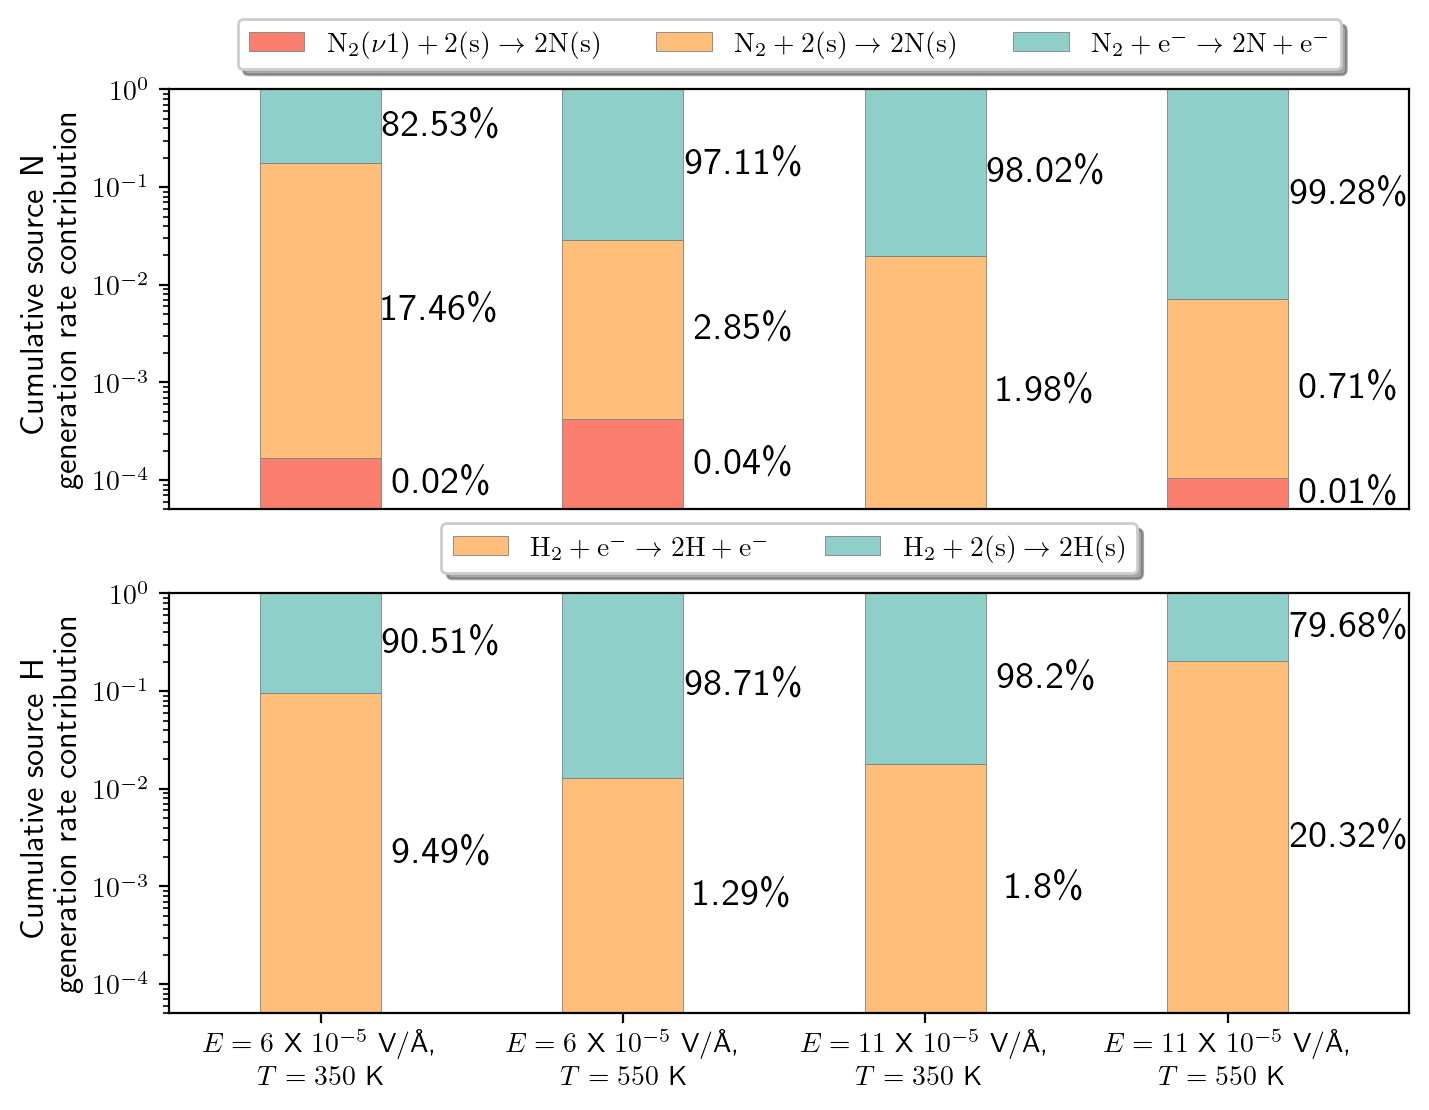

In [12]:
import string
import pickle
import matplotlib as mpl

mpl.rc('text', usetex = True)
labels = ['bolsig:N2->N2(SUM)',
          'N2+2SURF=>NSURF+NSURF',
          'N2(V1)+2SURF=>NSURF+NSURF',
         ]
real_label = [r'$\mathrm{N}_2+\mathrm{e}^- \rightarrow 2\mathrm{N}+\mathrm{e}^-$',
              r'$\mathrm{N}_2+2(\mathrm{s}) \rightarrow 2\mathrm{N}(\mathrm{s})$',
              r'$\mathrm{N}_2(\nu 1)+2(\mathrm{s}) \rightarrow 2\mathrm{N}(\mathrm{s})$',
             ]
cond = ['$E=6$ X $10^{-5}$ V/\\r A, \n $\\quad \\quad T=350$ K',
        '$E=6$ X $10^{-5}$ V/\\r A, \n $\\quad \\quad T=550$ K',
        '$E=11$ X $10^{-5}$ V/\\r A, \n $\\quad \\quad T=350$ K',
        '$E=11$ X $10^{-5}$ V/\\r A, \n $\\quad \\quad T=550$ K']
file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
mycolor1 = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2', '8993BF', 'C76DA2']
mycolor2 = ['#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2','#BEB8DC','#E7DAD2',]
x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

fig, aaa = plt.subplots(2, dpi=200, figsize=(8,6))
ax = aaa[0]
axe = aaa[1]
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)
print(prev_outcomes)
accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]

#ax.text(0.01, 0.88, '('+string.ascii_uppercase[0]+')', transform=ax.transAxes, 
#        size=20, weight='bold')
for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0.:
            center = np.sqrt(0.00005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            #center -= 0.005
            pass
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=14)

#ax.annotate(string.ascii_uppercase[0], xy=get_axis_limits(ax))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('~~~~~Cumulative source N\n generation rate contribution', fontsize=12)
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x, real_label)
#ax.set_xticklabels(cond, ha='center',)
ax.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True)
ax.set_yscale('log')
ax.set_ylim([0.00005, 1])
ax.set_xlim([-0.5,3.6])
ax.set_xticks([])



labels = ['H2+2SURF=>HSURF+HSURF',
          'E+H2=>2H+E',
          #'H2(V1)+2SURF=>HSURF+HSURF',
         ]
real_label = [r'$\mathrm{H}_2+2(\mathrm{s}) \rightarrow 2\mathrm{H}(\mathrm{s})$',
              r'$\mathrm{H}_2+\mathrm{e}^- \rightarrow 2\mathrm{H}+\mathrm{e}^-$',
              #r'$\mathrm{H}_2(\nu 1)+2(\mathrm{s}) \rightarrow 2\mathrm{H}(\mathrm{s})$',
             ]
cond = ['$E=6$ X $10^{-5}$ V/\\r A, \n $\\quad \\quad T=350$ K',
        '$E=6$ X $10^{-5}$ V/\\r A, \n $\\quad \\quad T=550$ K',
        '$E=11$ X $10^{-5}$ V/\\r A, \n $\\quad \\quad T=350$ K',
        '$E=11$ X $10^{-5}$ V/\\r A, \n $\\quad \\quad T=550$ K']
file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
mycolor1 = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2', '8993BF', 'C76DA2']
mycolor2 = ['#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2','#BEB8DC','#E7DAD2',]
x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

axe = aaa[1]
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)
print(prev_outcomes)
accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]

#axe.text(0.01, -0.32, '('+string.ascii_uppercase[1]+')', transform=ax.transAxes, 
#        size=20, weight='bold')
for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0.:
            center = np.sqrt(0.00005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            #center -= 0.005
            pass
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=14)

#ax.annotate(string.ascii_uppercase[0], xy=get_axis_limits(ax))
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('~~~~~Cumulative source H\n generation rate contribution', fontsize=12)
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x, real_label)
#ax.set_xticklabels(cond, ha='center',)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True)
axe.set_yscale('log')
axe.set_ylim([0.00005, 1])
axe.set_xlim([-0.5,3.6])

#fig.tight_layout()

In [119]:
# Mixture, all gas species
import string
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
import pickle

mpl.rc('text', usetex = True)
labels = ['NH2+HSURF=>NH3+SURF',
          'H+NH2SURF=>NH3+SURF',
          'H2+NHSURF=>NH3+SURF',
          'NH+H2+H2=>NH3+H2',
          'NH+H2+N2=>NH3+N2']
real_label = [r'$\mathrm{NH}_2+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{NH}_3+(\mathrm{s})$',
              r'$\mathrm{H}+\mathrm{NH}_2(\mathrm{s}) \rightarrow \mathrm{NH}_3+(\mathrm{s})$',
              r'$\mathrm{H}_2+\mathrm{NH}(\mathrm{s}) \rightarrow \mathrm{NH}_3+(\mathrm{s})$', 
              r'$\mathrm{NH}+\mathrm{H}_2+\mathrm{H}_2 \rightarrow \mathrm{NH}_3+\mathrm{H}_2$',
              r'$\mathrm{NH}+\mathrm{H}_2+\mathrm{N}_2 \rightarrow  \mathrm{NH}_3+\mathrm{N}_2$']
cond = ['$E=6 \\times 10^{-5}$ V/\\r A, \n $\\quad \\quad T=350$ K',
        '$E=6 \\times 10^{-5}$ V/\\r A, \n $\\quad \\quad T=550$ K',
        '$E=11 \\times 10^{-5}$ V/\\r A, \n $\\quad \\quad T=350$ K',
        '$E=11 \\times 10^{-5}$ V/\\r A, \n $\\quad \\quad T=550$ K']
file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
x = np.arange(len(cond))  # the label locations
width = 0.4  # the width of the bars

fig = plt.figure(dpi=200, figsize=(12*4,6*8//2*2.5))
gs = gridspec.GridSpec(5, 2)
ax = plt.subplot(gs[0,0])
axe = plt.subplot(gs[0,1])
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.001:
            center = np.sqrt(0.001*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

ax.text(0.02, 0.9, '('+string.ascii_lowercase[0]+')', transform=ax.transAxes, 
        size=30*2, weight='bold')

#ax.annotate(string.ascii_lowercase[0], xy=get_axis_limits(ax))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative NH$_3$ generation rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x, cond, fontsize = 17.5*2)
ax.set_xticks([])
#ax.set_xticklabels(real_label, rotation=-5.5)
ax.tick_params(axis='y', which='major', labelsize=17.5*2)
ax.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.17),
          fancybox=True, shadow=True, fontsize = 32)
ax.set_ylim([0.001, 1])
ax.set_xlim([-0.5,3.6])
ax.set_yscale('log')



labels = ['E+NH3=>E+NH2+H',
          'E+NH3=>E+NH+H2',
          'H+NH3=>NH2+H2']
real_label = [r'$\mathrm{e}^{-}+\mathrm{NH}_3 \rightarrow \mathrm{e}^{-}+\mathrm{NH}_2+\mathrm{H}$',
              r'$\mathrm{e}^{-}+\mathrm{NH}_3 \rightarrow \mathrm{e}^{-}+\mathrm{NH}+\mathrm{H}_2$',
              r'$\mathrm{H}+\mathrm{NH}_3 \rightarrow \mathrm{NH}_2+\mathrm{H}_2$']
x = np.arange(len(labels))  # the label locations
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.001:
            center = np.sqrt(0.001*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

axe.text(0.02, 0.9, '('+string.ascii_lowercase[1]+')', transform=axe.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Cumulative NH$_3$ loss rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')
#axe.set_xticks(x, real_label, fontsize = 17.5*2)
axe.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
axe.tick_params(axis='y', which='major', labelsize=17.5*2)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.16),
          fancybox=True, shadow=True, fontsize = 32)
axe.set_ylim([0.001, 1])
axe.set_xlim([-0.5,3.6])
axe.set_yscale('log')





# NH2
import matplotlib as mpl
mpl.rc('text', usetex = True)
labels = ['E+NH3=>E+NH2+H',
          'NH3^++NH3=>NH4^++NH2',
          'E+NH4^+=>NH2+2H',
          'H+NH3=>NH2+H2']
real_label = [r'$\mathrm{e}^{-}+\mathrm{NH}_3 \rightarrow \mathrm{e}^{-}+\mathrm{NH}_2+\mathrm{H}$',
              r'$\mathrm{NH}_3^++\mathrm{NH}_3 \rightarrow \mathrm{NH}_4^++\mathrm{NH}_2$',
              r'$\mathrm{e}^{-}+\mathrm{NH}_4^+ \rightarrow \mathrm{NH}_2+2\mathrm{H}$',
              r'$\mathrm{H}+\mathrm{NH}_3 \rightarrow \mathrm{NH}_2+\mathrm{H}_2$']
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

ax = plt.subplot(gs[1,0])
axe = plt.subplot(gs[1,1])
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.015:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.001:
            center = np.sqrt(0.001*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

ax.text(0.02, 0.9, '('+string.ascii_lowercase[2]+')', transform=ax.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative NH$_2$ generation rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x, real_label, fontsize = 17.5*2)
ax.set_xticks([])
#ax.set_xticklabels(real_label, rotation=-5.5)
ax.tick_params(axis='y', which='major', labelsize=17.5*2)
ax.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.17),
          fancybox=True, shadow=True, fontsize = 32)
ax.set_ylim([0.001, 1])
ax.set_xlim([-0.5,3.6])
ax.set_yscale('log')


labels = ['NH2+HSURF=>NH3+SURF',
          'H2+NH2=>NH3+H']
real_label = [r'$\mathrm{NH}_2+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{NH}_3+(\mathrm{s})$',
              r'$\mathrm{H}_2+\mathrm{NH}_2 \rightarrow \mathrm{NH}_3+\mathrm{H}$'
              ]
x = np.arange(len(labels))  # the label locations
count = -1.5

prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0005:
            center = np.sqrt(0.0005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)
    
axe.text(0.02, 0.9, '('+string.ascii_lowercase[3]+')', transform=axe.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Cumulative NH$_2$ loss rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')
#axe.set_xticks(x, real_label, fontsize = 17.5*2)
axe.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
axe.tick_params(axis='y', which='major', labelsize=17.5*2)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.16),
          fancybox=True, shadow=True, fontsize = 32)
axe.set_ylim([0.0005, 1])
axe.set_xlim([-0.5,3.6])
axe.set_yscale('log')



#NH

ax = plt.subplot(gs[2,0])
axe = plt.subplot(gs[2,1])

mpl.rc('text', usetex = True)
labels = ['E+NH3=>E+NH+H2',
          'N+H2(B3SIG)=>H+NH',
          'N+H2(B1SIG)=>H+NH']
real_label = [r'$\mathrm{e}^-+\mathrm{NH}_3 \rightarrow \mathrm{e}^-+\mathrm{NH}+\mathrm{H}_2$',
              r'$\mathrm{N}+\mathrm{H}_2\mathrm{(B3SIG)} \rightarrow \mathrm{H}+\mathrm{NH}$',
              r'$\mathrm{N}+\mathrm{H}_2\mathrm{(B1SIG)} \rightarrow \mathrm{H}+\mathrm{NH}$']

file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
x = np.arange(len(labels))  # the label locations

count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0005:
            center = np.sqrt(0.0005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

ax.text(0.02, 0.9, '('+string.ascii_lowercase[4]+')', transform=ax.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative NH generation rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x, real_label, fontsize = 17.5*2)
ax.set_xticks([])
#ax.set_xticklabels(real_label, rotation=-5.5)
ax.tick_params(axis='y', which='major', labelsize=17.5*2)
ax.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.16),
          fancybox=True, shadow=True, fontsize = 32)
ax.set_ylim([0.0005, 1])
ax.set_xlim([-0.5,3.6])
ax.set_yscale('log')


labels = ['NH+HSURF=>NH2SURF',
          'NH+H2+H2=>NH3+H2',
          'NH+H2+N2=>NH3+N2',
          'H+NH=>N+H2']
real_label = [r'$\mathrm{NH}+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{NH}_2(\mathrm{s})$',
              r'$\mathrm{NH}+\mathrm{H}_2+\mathrm{N}_2 \rightarrow \mathrm{NH}_3+\mathrm{N}_2$',
              r'$\mathrm{NH}+\mathrm{H}_2+\mathrm{H}_2 \rightarrow \mathrm{NH}_3+\mathrm{H}_2$',
              r'$\mathrm{H}+\mathrm{NH} \rightarrow \mathrm{N}+\mathrm{H}_2$']
x = np.arange(len(labels))  # the label locations
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.001:
            center = np.sqrt(0.001*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 0.74<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 0.76:
            center -= 0.01
        #print(center)
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

axe.text(0.02, 0.9, '('+string.ascii_lowercase[5]+')', transform=axe.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Cumulative NH loss rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')
#axe.set_xticks(x, real_label, fontsize = 17.5*2)
axe.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
axe.tick_params(axis='y', which='major', labelsize=17.5*2)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.17),
          fancybox=True, shadow=True, fontsize = 32)
axe.set_ylim([0.001, 1])
axe.set_xlim([-0.5,3.6])
axe.set_yscale('log')



# H
import matplotlib as mpl
mpl.rc('text', usetex = True)
labels = ['E+NH3=>E+NH2+H',
          'H2+NH2=>NH3+H',
          'E+NH4^+=>NH3+H']
real_label = [r'$\mathrm{e}^{-}+\mathrm{NH}_3 \rightarrow \mathrm{e}^{-}+\mathrm{NH}_2+\mathrm{H}$',
              r'$\mathrm{H}_2+\mathrm{NH}_2 \rightarrow \mathrm{NH}_3+\mathrm{H}$',
              r'$\mathrm{e}^{-}+\mathrm{NH}_4^+ \rightarrow \mathrm{NH}_3+\mathrm{H}$']

file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

ax = plt.subplot(gs[3,0])
axe = plt.subplot(gs[3,1])
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0005:
            center = np.sqrt(0.0005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.000
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

ax.text(0.02, 0.9, '('+string.ascii_lowercase[6]+')', transform=ax.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative H generation rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x, real_label, fontsize = 17.5*2)
ax.set_xticks([])
#ax.set_xticklabels(real_label, rotation=-5.5)
ax.tick_params(axis='y', which='major', labelsize=17.5*2)
ax.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.16),
          fancybox=True, shadow=True, fontsize = 32)
ax.set_ylim([0.0005, 1])
ax.set_xlim([-0.5,3.6])
ax.set_yscale('log')


labels = ['H+HSURF=>H2+SURF',
          'H+NH2SURF=>NH3+SURF']
real_label = [r'$\mathrm{H}+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{H}_2+(\mathrm{s})$',
              r'$\mathrm{H}+\mathrm{NH}_2(\mathrm{s}) \rightarrow \mathrm{NH}_3+(\mathrm{s})$'
              ]
x = np.arange(len(labels))  # the label locations
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.001:
            center = np.sqrt(0.001*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 0.74<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 0.76:
            center -= 0.0
        #print(center)
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

axe.text(0.02, 0.9, '('+string.ascii_lowercase[7]+')', transform=axe.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Cumulative H loss rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')
#axe.set_xticks(x, real_label, fontsize = 17.5*2)
axe.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
axe.tick_params(axis='y', which='major', labelsize=17.5*2)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.16),
          fancybox=True, shadow=True, fontsize = 32)
axe.set_ylim([0.001, 1])
axe.set_xlim([-0.5,3.6])
axe.set_yscale('log')

#N

ax = plt.subplot(gs[4,0])
axe = plt.subplot(gs[4,1])

mpl.rc('text', usetex = True)
labels = ['H+NH=>N+H2',
          'NH+NH=>N+NH2',
          'NH+NH2=>NH3+N',
          'E+NH2=>E+N+H2']
real_label = [r'$\mathrm{H}+\mathrm{NH} \rightarrow \mathrm{N}+\mathrm{H}_2$',
              r'$\mathrm{NH}+\mathrm{NH} \rightarrow \mathrm{N}+\mathrm{NH}_2$',
              r'$\mathrm{NH}+\mathrm{NH}_2 \rightarrow \mathrm{NH}_3+\mathrm{N}$',
              r'$\mathrm{e}^-+\mathrm{NH}_2 \rightarrow \mathrm{e}^- +\mathrm{N}+\mathrm{H}_2$']

file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
x = np.arange(len(cond))  # the label locations

count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0001:
            center = np.sqrt(0.0001*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.000
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

ax.text(0.02, 0.9, '('+string.ascii_lowercase[8]+')', transform=ax.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative N generation rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x, cond, fontsize = 17.5*2)
#ax.set_xticks([])
#ax.set_xticklabels(real_label, rotation=-5.5)
ax.tick_params(axis="x",direction="in", pad=22)
ax.tick_params(axis='y', which='major', labelsize=17.5*2)
ax.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.17),
          fancybox=True, shadow=True, fontsize = 32)
ax.set_ylim([0.0001, 1])
ax.set_xlim([-0.5,3.6])
ax.set_yscale('log')


labels = ['N+HSURF=>NHSURF',
          'N+NSURF=>N2+SURF',
          'N+H2(B3SIG)=>H+NH',
          'N+NH2=>N2+H2',
          'N+NH2=>N2+2H',
          'N+H2(B1SIG)=>H+NH']
real_label = [r'$\mathrm{N}+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{NH}(\mathrm{s})$',
              r'$\mathrm{N}+\mathrm{N}(\mathrm{s}) \rightarrow \mathrm{N}_2+(\mathrm{s})$',
              r'$\mathrm{N}+\mathrm{H}_2(\mathrm{B3SIG}) \rightarrow \mathrm{H}+\mathrm{NH}$',
              r'$\mathrm{N}+\mathrm{NH}_2 \rightarrow \mathrm{N}_2+\mathrm{H}_2$',
              r'$\mathrm{N}+\mathrm{NH}_2 \rightarrow \mathrm{N}_2+2\mathrm{H}$',
              r'$\mathrm{N}+\mathrm{H}_2(\mathrm{B1SIG}) \rightarrow \mathrm{H}+\mathrm{NH}$']
x = np.arange(len(cond))  # the label locations
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0001:
            center = np.sqrt(0.0001*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 0.025<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 0.035:
            center -= 0.05
        #print(center)
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

axe.text(0.02, 0.9, '('+string.ascii_lowercase[9]+')', transform=axe.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Cumulative N loss rate contribution', fontsize=43)
#ax.set_title('Scores by group and gender')cumulative
axe.set_xticks(x, cond, fontsize = 17.5*2)
#axe.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
axe.tick_params(axis="x", direction="in", pad=22)
axe.tick_params(axis='y', which='major', labelsize=17.5*2)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.17),
          fancybox=True, shadow=True, fontsize = 32)
axe.set_ylim([0.0001, 1])
axe.set_xlim([-0.5,3.6])
axe.set_yscale('log')

fig.tight_layout()

plt.show()

In [18]:
# mixture, All surface species!!!!!!!!!!!
import string
import matplotlib as mpl
mpl.rc('text', usetex = True)
labels = ['H2+2SURF=>HSURF+HSURF',
          'H+SURF=>HSURF',
          'H2(V1)+2SURF=>HSURF+HSURF']
real_label = [r'$\mathrm{H}_2+2\mathrm{(s)} \rightarrow 2\mathrm{H}\mathrm{(s)}$',
              r'$\mathrm{H}+\mathrm{(s)} \rightarrow \mathrm{H(s)}$',
              r'$\mathrm{H}_2(\nu 1)+2\mathrm{(s)} \rightarrow 2\mathrm{H}\mathrm{(s)}$']
cond = ['$E=6 \\times 10^{-5}$ V/\\r A, \n $\\quad \\quad T=350$ K',
        '$E=6 \\times 10^{-5}$ V/\\r A, \n $\\quad \\quad T=550$ K',
        '$E=11 \\times 10^{-5}$ V/\\r A, \n $\\quad \\quad T=350$ K',
        '$E=11 \\times 10^{-5}$ V/\\r A, \n $\\quad \\quad T=550$ K']
file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, aaa = plt.subplots(4,2, dpi=200, figsize=(12*4,6*8))
ax = aaa[0,0]
axe = aaa[0,1]
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.00005:
            center = np.sqrt(0.00005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

ax.text(0.02, 0.9, '('+string.ascii_lowercase[0]+')', transform=ax.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative $\mathrm{H}$(s) generation rate contribution', fontsize=21.5*2)
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x, cond, fontsize = 17.5*2)
ax.set_xticks([])
#ax.set_xticklabels(real_label, rotation=-5.5)
ax.tick_params(axis='y', which='major', labelsize=17.5*2)
ax.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, fontsize = 32)
ax.set_ylim([0.00005, 1])
ax.set_xlim([-0.5,3.6])
ax.set_yscale('log')


labels = ['H+HSURF=>H2+SURF',
          'NH2+HSURF=>NH3+SURF',
          'NH+HSURF=>NH2SURF',
          'N+HSURF=>NHSURF',
          'NH2SURF+HSURF=>NH3+2SURF']
real_label = [r'$\mathrm{H}+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{H}_2+(\mathrm{s})$',
              r'$\mathrm{NH}_2+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{NH}_3+(\mathrm{s})$',
              r'$\mathrm{NH}+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{NH}_2(\mathrm{s})$',
              r'$\mathrm{N}+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{NH}(\mathrm{s})$',
              r'$\mathrm{NH}_2\mathrm{(s)}+\mathrm{H}(\mathrm{s}) \rightarrow \mathrm{NH}_3+2(\mathrm{s})$'
              ]
x = np.arange(len(labels))  # the label locations
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0005:
            center = np.sqrt(0.0005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)
        
axe.text(0.02, 0.9, '('+string.ascii_lowercase[1]+')', transform=axe.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Cumulative $\mathrm{H}$(s) loss rate contribution', fontsize=21.5*2)
#ax.set_title('Scores by group and gender')
#axe.set_xticks(x, real_label, fontsize = 17.5*2)
axe.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
axe.tick_params(axis='y', which='major', labelsize=17.5*2)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.17),
          fancybox=True, shadow=True, fontsize = 32)
axe.set_ylim([0.0005, 1])
axe.set_xlim([-0.5,3.6])
axe.set_yscale('log')

# Nsurf

ax = aaa[1,0]
axe = aaa[1,1]

mpl.rc('text', usetex = True)
labels = ['N2+2SURF=>NSURF+NSURF',
          'N+SURF=>NSURF',
          'N2(V1)+2SURF=>NSURF+NSURF',]
real_label = [r'$\mathrm{N}_2+2\mathrm{(s)} \rightarrow 2\mathrm{N}\mathrm{(s)}$',
              r'$\mathrm{N}+\mathrm{(s)} \rightarrow \mathrm{N}\mathrm{(s)}$',
              r'$\mathrm{N}_2(\nu 1)+2\mathrm{(s)} \rightarrow 2\mathrm{N}\mathrm{(s)}$',]

file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
x = np.arange(len(labels))  # the label locations

count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0005:
            center = np.sqrt(0.0005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

ax.text(0.02, 0.9, '('+string.ascii_lowercase[2]+')', transform=ax.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative $\mathrm{N}$(s) generation rate contribution', fontsize=21.5*2)
#ax.set_title('Scores by group and gender')
#axe.set_xticks(x, real_label, fontsize = 17.5*2)
ax.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
ax.tick_params(axis='y', which='major', labelsize=17.5*2)
ax.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, fontsize = 32)
ax.set_ylim([0.0005, 1])
ax.set_xlim([-0.5,3.6])
ax.set_yscale('log')


labels = ['H+NSURF=>NHSURF',
          'N+NSURF=>N2+SURF',
          'NSURF+HSURF=>NHSURF+SURF']
real_label = [r'$\mathrm{H}+\mathrm{N}(\mathrm{s}) \rightarrow \mathrm{NH}(\mathrm{s})$',
              r'$\mathrm{N}+\mathrm{N}(\mathrm{s}) \rightarrow \mathrm{N}_2+(\mathrm{s})$',
              r'$\mathrm{N(s)}+\mathrm{H(s)} \rightarrow \mathrm{NH(s)}+\mathrm{(s)}$']
x = np.arange(len(labels))  # the label locations
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0005:
            center = np.sqrt(0.0005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.00
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

axe.text(0.02, 0.9, '('+string.ascii_lowercase[3]+')', transform=axe.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Cumulative $\mathrm{N}$(s) loss rate contribution', fontsize=21.5*2)
#ax.set_title('Scores by group and gender')
#axe.set_xticks(x, real_label, fontsize = 17.5*2)
axe.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
axe.tick_params(axis='y', which='major', labelsize=17.5*2)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, fontsize = 32)
axe.set_ylim([0.0005, 1])
axe.set_xlim([-0.5,3.6])
axe.set_yscale('log')



# NHsurf
labels = ['N+HSURF=>NHSURF',
          'NH+SURF=>NHSURF',
          'H+NSURF=>NHSURF',
          'NSURF+HSURF=>NHSURF+SURF']
real_label = [r'$\mathrm{N}+\mathrm{H(s)} \rightarrow \mathrm{NH}\mathrm{(s)}$',
              r'$\mathrm{NH}+\mathrm{(s)} \rightarrow \mathrm{NH(s)}$',
              r'$\mathrm{H}+\mathrm{N(s)} \rightarrow \mathrm{NH}\mathrm{(s)}$',
              r'$\mathrm{N(s)}+\mathrm{H(s)} \rightarrow \mathrm{NH(s)}+\mathrm{(s)}$']

file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
x = np.arange(len(labels))  # the label locations

ax = aaa[2,0]
axe = aaa[2,1]
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.015:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0005:
            center = np.sqrt(0.0005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

ax.text(0.02, 0.9, '('+string.ascii_lowercase[4]+')', transform=ax.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative $\mathrm{NH}$(s) generation rate contribution', fontsize=21.5*2)
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x, real_label, fontsize = 17.5*2)
ax.set_xticks([])
#ax.set_xticklabels(real_label, rotation=-5.5)
ax.tick_params(axis='y', which='major', labelsize=17.5*2)
ax.legend(ncol=4,loc='upper center', bbox_to_anchor=(0.5, 1.09),
          fancybox=True, shadow=True, fontsize = 28)
ax.set_ylim([0.0005, 1])
ax.set_xlim([-0.5,3.6])
ax.set_yscale('log')


labels = ['H2+NHSURF=>NH3+SURF',
          'H2(V1)+NHSURF=>NH3+SURF',
          'H+NHSURF=>NH2SURF']
real_label = [r'$\mathrm{H}_2+\mathrm{NH}(\mathrm{s}) \rightarrow \mathrm{NH}_3+(\mathrm{s})$',
              r'$\mathrm{H}_2(\nu 1)+\mathrm{NH}(\mathrm{s}) \rightarrow \mathrm{NH}_3+(\mathrm{s})$',
              r'$\mathrm{H}+\mathrm{NH}(\mathrm{s}) \rightarrow \mathrm{NH}_2(\mathrm{s})$'
              ]
x = np.arange(len(labels))  # the label locations
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0005:
            center = np.sqrt(0.0005*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.005
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

axe.text(0.02, 0.9, '('+string.ascii_lowercase[5]+')', transform=axe.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Cumulative $\mathrm{NH}$(s) loss rate contribution', fontsize=21.5*2)
#ax.set_title('Scores by group and gender')
#axe.set_xticks(x, real_label, fontsize = 17.5*2)
axe.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
axe.tick_params(axis='y', which='major', labelsize=17.5*2)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, fontsize = 32)
axe.set_ylim([0.0005, 1])
axe.set_xlim([-0.5,3.6])
axe.set_yscale('log')

# NH2surf

ax = aaa[3,0]
axe = aaa[3,1]

mpl.rc('text', usetex = True)
labels = ['NH+HSURF=>NH2SURF',
          'H+NHSURF=>NH2SURF',
          'NH2+SURF=>NH2SURF',]
real_label = [r'$\mathrm{NH}+\mathrm{H(s)} \rightarrow \mathrm{NH}_2\mathrm{(s)}$',
              r'$\mathrm{H}+\mathrm{NH(s)} \rightarrow \mathrm{NH}_2\mathrm{(s)}$',
              r'$\mathrm{NH}_2+\mathrm{(s)} \rightarrow \mathrm{NH}_2\mathrm{(s)}$',]
file = ['extract_0.06_350.pkl', 'extract_0.06_550.pkl','extract_0.11_350.pkl','extract_0.11_550.pkl']
x = np.arange(len(labels))  # the label locations

count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = ax.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.015:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0001:
            center = np.sqrt(0.0001*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.00
        ax.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

ax.text(0.02, 0.9, '('+string.ascii_lowercase[6]+')', transform=ax.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cumulative $\mathrm{NH}_2$(s) generation rate contribution', fontsize=21.5*2)
#ax.set_title('Scores by group and gender')
ax.set_xticks(range(4), cond, fontsize = 17.5*2)
#ax.set_xticks([])
#ax.set_xticklabels(real_label, rotation=-5.5)
ax.tick_params(axis="x",direction="in", pad=22)
ax.tick_params(axis='y', which='major', labelsize=17.5*2)
ax.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, fontsize = 32)
ax.set_ylim([0.0001, 1])
ax.set_xlim([-0.5,3.6])
ax.set_yscale('log')


labels = ['H+NH2SURF=>NH3+SURF',
          'NH2SURF+HSURF=>NH3+2SURF']
real_label = [r'$\mathrm{H}+\mathrm{NH}_2(\mathrm{s}) \rightarrow \mathrm{NH}_3+(\mathrm{s})$',
              r'$\mathrm{NH}_2\mathrm{(s)}+\mathrm{H(s)} \rightarrow \mathrm{NH}_3+2\mathrm{(s)}$']
x = np.arange(len(labels))  # the label locations
count = -1.5
prev_outcomes = np.zeros(0).reshape(0, len(real_label))
for i in range(len(file)):
    with open(file[i], 'rb') as fp:
        tmp = pickle.load(fp)
    outcomes = []
    for spec in labels:
        approx = interp1d(tmp.t, tmp.get_rate(spec))
        outcomes.append(approx(4000))
    outcomes = np.array(outcomes)
    prev_outcomes = np.vstack((prev_outcomes, outcomes.reshape(1, -1)))
    count += 1
    
prev_outcomes = prev_outcomes.T
prev_outcomes = prev_outcomes/np.sum(prev_outcomes, 0)

accum_outcome = np.zeros(prev_outcomes.shape[1])
for i in range(prev_outcomes.shape[0]-1, -1, -1):
    rects1 = axe.bar(cond, prev_outcomes[i, :], width, 
                    label=real_label[i], bottom=accum_outcome, 
                    color=mycolor2[i], edgecolor='grey', linewidth=.3)
    accum_outcome += prev_outcomes[i, :]


for i in range(prev_outcomes.shape[1]):
    for j in range(prev_outcomes.shape[0]):
        length = prev_outcomes.shape[0]
        if prev_outcomes[:, i][length-j-1]*100 < 0.01:
            continue
        base = np.sum(prev_outcomes[:, i][length-j-1:])-prev_outcomes[:, i][length-j-1]
        roof = np.sum(prev_outcomes[:, i][length-j-1:])
        if base == 0. or base < 0.0001:
            center = np.sqrt(0.0001*roof)
        else:
            center = np.sqrt(base*roof)
        if np.round(prev_outcomes[:, i][length-j-1]*100,2) < 1. and i == 2:
            center -= 0.0
        elif 1.<np.round(prev_outcomes[:, i][length-j-1]*100,2) < 2. and i == 2:
            center -= 0.00
        axe.text(i+width, center,
                str(np.round(prev_outcomes[:, i][length-j-1]*100, 2))+'\%',
                va = 'center', ha = 'center',
                size=30)

axe.text(0.02, 0.9, '('+string.ascii_lowercase[7]+')', transform=axe.transAxes, 
        size=30*2, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Cumulative $\mathrm{NH}_2$(s) loss rate contribution', fontsize=21.5*2)
#ax.set_title('Scores by group and gender')cumulative
axe.set_xticks(range(4), cond, fontsize = 17.5*2)
#axe.set_xticks([])
#axe.set_xticklabels(real_label, rotation=-3.5)
axe.tick_params(axis="x", direction="in", pad=22)
axe.tick_params(axis='y', which='major', labelsize=17.5*2)
axe.legend(ncol=3,loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, fontsize = 32)
axe.set_ylim([0.0001, 1])
axe.set_xlim([-0.5,3.6])
axe.set_yscale('log')

fig.tight_layout()

plt.show()

In [14]:
E06T350 = np.array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.24152385e-05, 1.64415155e-04, 8.52228773e-01,
       5.49368059e-01, 2.33628643e-01, 2.31312636e-02, 4.51483359e-03,
       3.13510163e-03, 2.84103227e-10])

In [15]:
E06T550 = np.array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 6.23315078e-03, 2.00388628e-03, 1.31431350e-02,
       1.34734662e-02, 8.39737782e-03, 8.13788953e-03, 1.13058014e-02,
       6.26569370e-03, 1.48087616e-05])

In [16]:
E11T350 = np.array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.75576945e-02, 4.91054653e-03, 5.87115994e-03,
       7.42657869e-03, 1.52873113e-02, 6.66940189e-03, 8.85164597e-03,
       1.52171480e-02, 1.00000000e+00])

In [17]:
E11T550 = np.array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.63284769e-01, 2.78221348e-02, 7.15239623e-03,
       1.57199284e-02, 7.06388130e-02, 1.35656900e-02, 2.42178046e-02,
       4.52050787e-02, 1.00000000e+00])

In [13]:
# this stickingP should be collected four times
np.loadtxt('Model_SA_Const_Entropy_extract/stickingP.txt')

array([3.73300044e+03, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.63284769e-01, 2.78221348e-02, 7.15239623e-03,
       1.57199284e-02, 7.06388130e-02, 1.35656900e-02, 2.42178046e-02,
       4.52050787e-02, 1.00000000e+00])

In [18]:
total = np.concatenate((E06T350.reshape(1,-1), E06T550.reshape(1,-1), E11T350.reshape(1,-1), E11T550.reshape(1,-1)), 0)

In [19]:
total = total[:,4:]

In [20]:
total

array([[2.24152385e-05, 1.64415155e-04, 8.52228773e-01, 5.49368059e-01,
        2.33628643e-01, 2.31312636e-02, 4.51483359e-03, 3.13510163e-03,
        2.84103227e-10],
       [6.23315078e-03, 2.00388628e-03, 1.31431350e-02, 1.34734662e-02,
        8.39737782e-03, 8.13788953e-03, 1.13058014e-02, 6.26569370e-03,
        1.48087616e-05],
       [2.75576945e-02, 4.91054653e-03, 5.87115994e-03, 7.42657869e-03,
        1.52873113e-02, 6.66940189e-03, 8.85164597e-03, 1.52171480e-02,
        1.00000000e+00],
       [2.63284769e-01, 2.78221348e-02, 7.15239623e-03, 1.57199284e-02,
        7.06388130e-02, 1.35656900e-02, 2.42178046e-02, 4.52050787e-02,
        1.00000000e+00]])

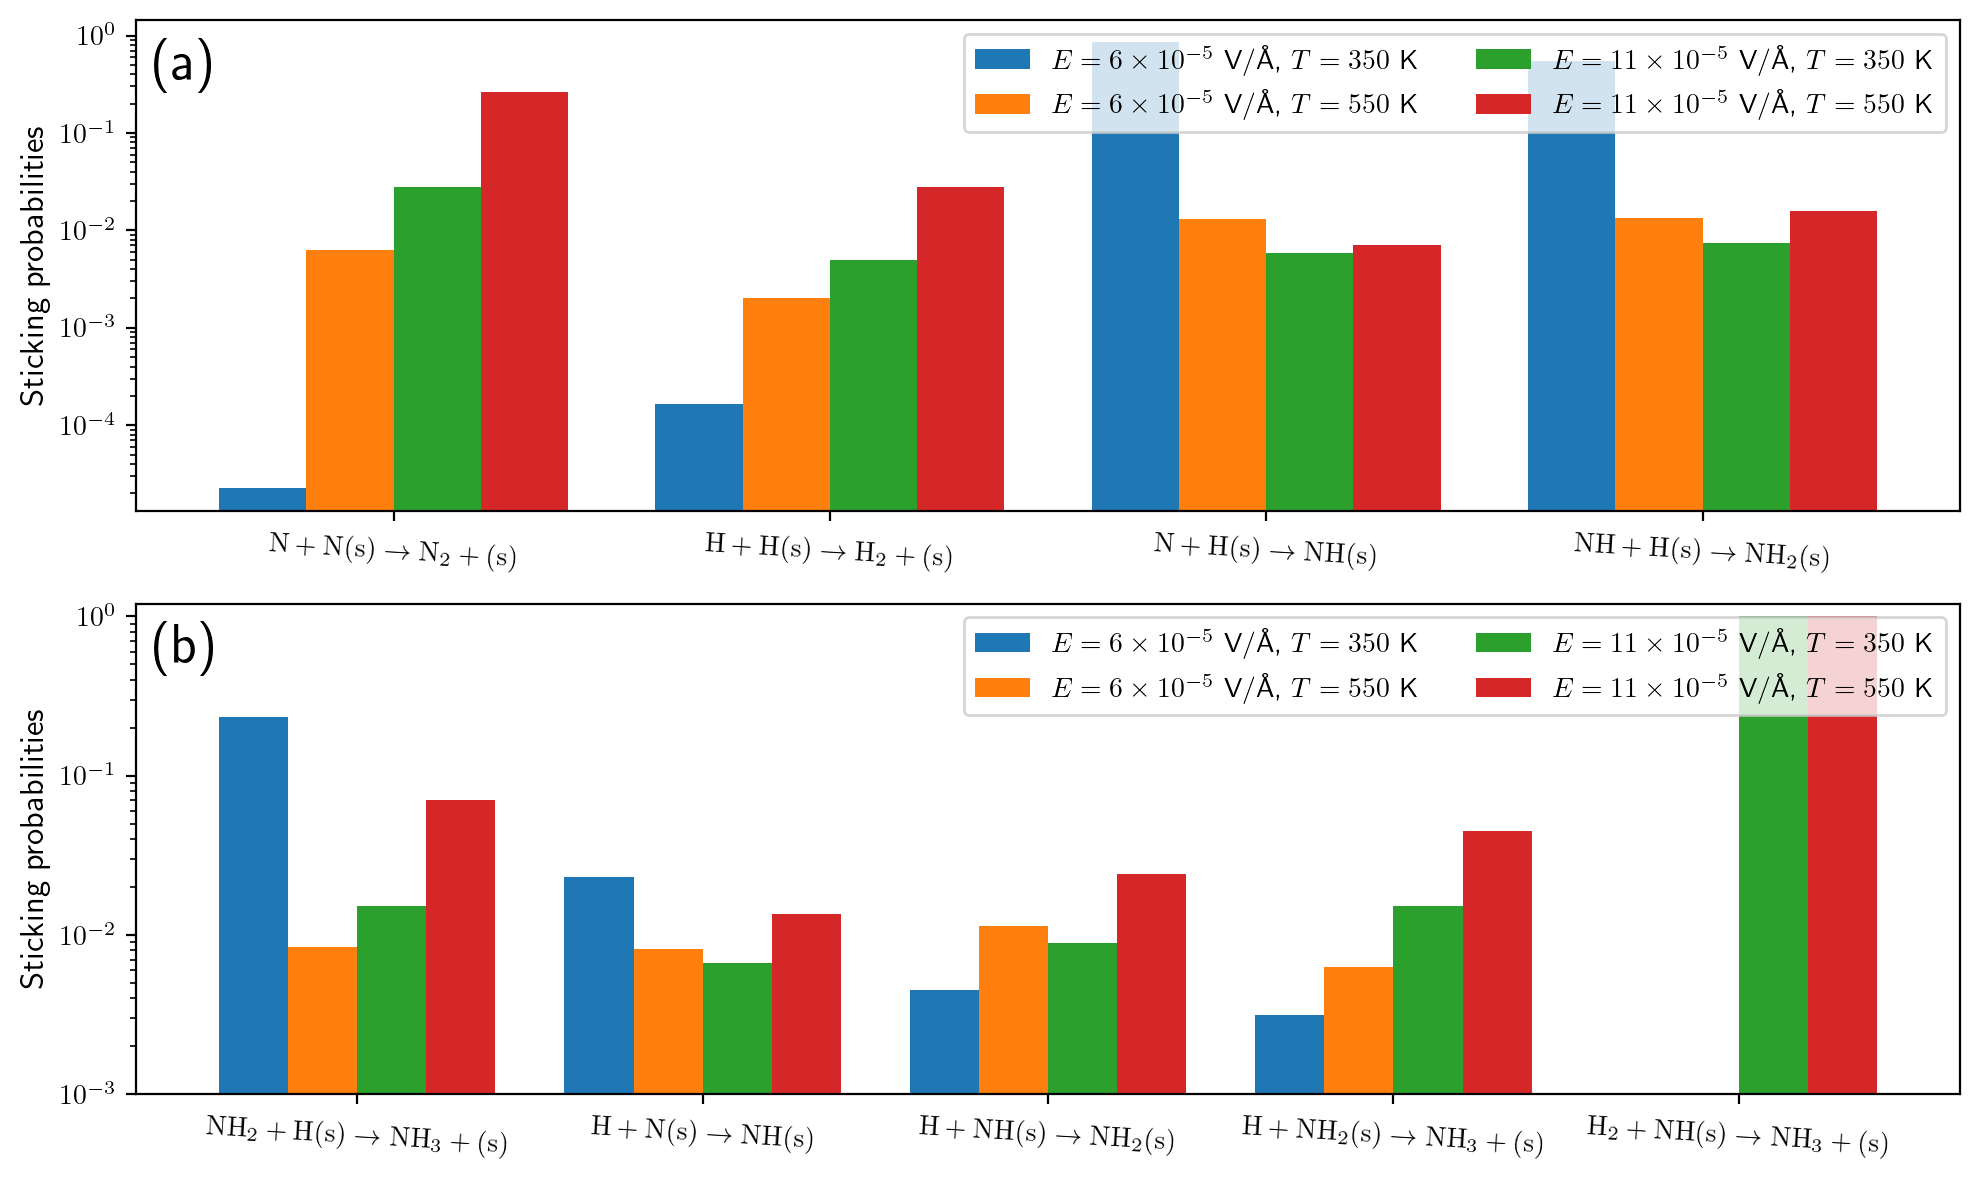

In [190]:
# Sticking Ps
import matplotlib as mpl
mpl.rc('text', usetex = True)

real_label = [r'$\mathrm{N}+\mathrm{N(s)} \rightarrow \mathrm{N}_2+\mathrm{(s)}$',
              r'$\mathrm{H}+\mathrm{H(s)} \rightarrow \mathrm{H}_2+\mathrm{(s)}$',
              r'$\mathrm{N}+\mathrm{H(s)} \rightarrow \mathrm{NH(s)}$',
              r'$\mathrm{NH}+\mathrm{H(s)} \rightarrow \mathrm{NH}_2\mathrm{(s)}$']
cond = [r'$E=6 \times 10^{-5}$ V/\r A, $T=350$ K',
        r'$E=6 \times 10^{-5}$ V/\r A, $T=550$ K',
        r'$E=11 \times 10^{-5}$ V/\r A, $T=350$ K',
        r'$E=11 \times 10^{-5}$ V/\r A, $T=550$ K']
x = np.arange(len(real_label))  # the label locations
width = 0.2  # the width of the bars

fig, aaa = plt.subplots(2, dpi=200, figsize=(10,6))
ax = aaa[0]
axe = aaa[1]
count = -1.5
for i in range(len(cond)):
    rects1 = ax.bar(x + count*width, total[:,:4][i,:], width, label=cond[i])
    count += 1

ax.text(0.01, 0.88, '('+string.ascii_lowercase[0]+')', transform=ax.transAxes, 
        size=20, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sticking probabilities', fontsize=12)
#ax.set_title('Scores by group and gender')
ax.set_xticks(x, real_label)
ax.set_xticklabels(real_label, rotation=-3.5)
ax.legend(ncol=2)
ax.set_yscale('log')


real_label = [r'$\mathrm{NH}_2+\mathrm{H(s)} \rightarrow \mathrm{NH}_3+\mathrm{(s)}$',
              r'$\mathrm{H}+\mathrm{N(s)} \rightarrow \mathrm{NH(s)}$',
              r'$\mathrm{H}+\mathrm{NH(s)} \rightarrow \mathrm{NH}_2\mathrm{(s)}$',
              r'$\mathrm{H}+\mathrm{NH}_2\mathrm{(s)} \rightarrow \mathrm{NH}_3+\mathrm{(s)}$',
              r'$\mathrm{H}_2+\mathrm{NH}\mathrm{(s)} \rightarrow \mathrm{NH}_3+\mathrm{(s)}$',
              ]
x = np.arange(len(real_label))  # the label locations
count = -1.5
for i in range(len(cond)):
    rects1 = axe.bar(x + count*width, total[:,4:][i,:], width, label=cond[i])
    count += 1

axe.text(0.01, 0.88, '('+string.ascii_lowercase[1]+')', transform=axe.transAxes, 
        size=20, weight='bold')
# Add some text for labels, title and custom x-axis tick labels, etc.
axe.set_ylabel('Sticking probabilities', fontsize=12)
axe.set_ylim((0.001, 1.2))
#ax.set_title('Scores by group and gender')
axe.set_xticks(x, real_label)
axe.set_xticklabels(real_label, rotation=-3.5)
axe.legend(ncol=2, loc='upper right')
axe.set_yscale('log')


fig.tight_layout()

plt.show()